# A Quantitative Investiation of Hollywood's Leading Men:
## *--Examining the number and rate of film appearances, revenue, ROI, vote score of movies from Robert Downey Jr., Nicolas Cage, Leonardo DiCaprio, Tom Cruise, and Brad Pitt between 1985 and 2015--*

## Table of Contents
<ul>
<li><a href="#intro">1. Introduction</a></li>
<li><a href="#examination">2. Data Examination</a></li>
<li><a href="#wrangling">3. Data Wrangling</a></li>   
<li><a href="#eda">4. Exploratory Data Analysis</a></li>
<li><a href="#conclusions">5. Conclusions</a></li>
</ul>

<a id='intro'></a>
## 1. Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

<a id='examination'></a>
## 2. Data Examination

> **Process**: As my first steps, I'll load and take a peak into the data with `df.head()`, `df.describe()`, and `df.info()` functions. With these functions can gauge the tidiness of the data and mentally prepare for what type of manipulation and cleaning I'll need to do. Here too I expanded my ideas for my analysis and adjusted my questions.

In [264]:
# Import necessary packages and visualization libararies

import pandas as pd
pd.options.mode.chained_assignment = None  # To turn off a default warning
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick # For formatting x-axis label into dollar form
import seaborn as sns
from scipy.stats import linregress # For calculating the r value (correlation)
%matplotlib inline

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,5,tt0113101,1.234890,4000000,4300000,Four Rooms,Tim Roth|Antonio Banderas|Jennifer Beals|Madon...,NaN,Allison Anders|Alexandre Rockwell|Robert Rodri...,Twelve outrageous guests. Four scandalous requ...,...,It's Ted the Bellhop's first night on the job....,98,Comedy,Miramax Films|A Band Apart,12/25/95,293,6.4,1995,5723867,6153158
1,6,tt0107286,0.815631,0,12136938,Judgment Night,Emilio Estevez|Cuba Gooding Jr.|Denis Leary|Je...,NaN,Stephen Hopkins,Don't move. Don't whisper. Don't even breathe.,...,"While racing to a boxing match, Frank, Mike, J...",110,Action|Thriller|Crime,Largo Entertainment|JVC Entertainment Networks,10/15/93,36,6.4,1993,0,18320343
2,11,tt0076759,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,http://www.starwars.com/films/star-wars-episod...,George Lucas,"A long time ago in a galaxy far, far away...",...,Princess Leia is captured and held hostage by ...,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,3/20/77,4428,7.9,1977,39575591,2789712242


In [ ]:
# Load dataset and print out a few lines

movies_raw = pd.read_csv("tmdb-movies.csv")
movies_raw.head(3)

 > **Analysis**: First step of my analysis uses the `df.head()` function. Here I can quickly confirm that the data set was read and formatted correctly from the csv file with the right separators. For the purposes of my questions, I'll mainly be looking at the "original_title", "cast", "release_year", "budget_adj", and "revenue_adj", "popularity", and "vote_count" columsn. After I take a closer look at the dataset, I'll proceed to remove columns irrelevant to this project and various other data wrangling tasks. So far, one potential issue that I'll have to address is the "cast" columns that contains multiple actors separated by a pipe character and grouping the "release_year". 

In [265]:
# Perform operations to inspect data types and look for instances of missing or possibly errant data.

movies_raw.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10863.000000,10863.000000,1.086300e+04,1.086300e+04,10863.000000,10863.000000,10863.000000,10863.000000,1.086300e+04,1.086300e+04
mean,66050.111940,0.646457,1.467736e+07,3.988113e+07,102.070975,217.436159,5.975191,2001.323023,1.763014e+07,5.144542e+07
std,92116.330082,1.000308,3.091383e+07,1.170184e+08,31.385520,575.691262,0.935112,12.813462,3.431312e+07,1.446542e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10594.500000,0.207558,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20656.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75608.000000,0.713777,1.588747e+07,2.410305e+07,111.000000,146.000000,6.600000,2011.000000,2.103337e+07,3.387655e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> **Analysis**: After peaking into the dataset with the `movies.head()` call, we examined the statistical info of the ordinal data using `movies.describe()`. From here we can see that this dataset shows contains data on 10866 movies between 1960 to 2015. Ideally, I would've analyzed the data on a decade-level, but due to the limitations of the data set, I'll restructure the "release_year" column into three 10-year periods from 1985. In addition, since I only need data from 1985, I'll remove all rows that feature data pre-1985. There is some strange data in the "min" row showing many values with 0 that are not NaN. I'll take note of this and address it later if necessary. 
The "popularity" is shows a near 0 miniumun value but a max value of 32.98. I looked at the original data and it seems it is not an error, but rather that some movies simply have an arbitrarily high popularity rating. There is no desernable scale or quanitative measuring method for what this population score. I could also find no information online about it. Therefore, I will be ignoring it as correlation metric and using the "vote average" column which is both clean with no null or 0 values and easy to understand with what looks like as a 0-10 point system.


In [266]:
# Check the list of columns and their respective datatypes

movies_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10863 entries, 0 to 10862
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10863 non-null  int64  
 1   imdb_id               10853 non-null  object 
 2   popularity            10863 non-null  float64
 3   budget                10863 non-null  int64  
 4   revenue               10863 non-null  int64  
 5   original_title        10863 non-null  object 
 6   cast                  10787 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10819 non-null  object 
 9   tagline               8039 non-null   object 
 10  keywords              9370 non-null   object 
 11  overview              10859 non-null  object 
 12  runtime               10863 non-null  int64  
 13  genres                10840 non-null  object 
 14  production_companies  9833 non-null   object 
 15  release_date       

> **Analysis**: From the _**movies.info()**_ call, we can see a linear list of all the columns in the dataset and their respective data types. All 21 columns are not needed to answer my questions, so I will remove them in a later step. I opened the data in excel to do some quick manual input for some missing data, now that I've reloaded the csv file, several data times have turned from integers to floats. I will change that in the next section.


In [267]:
# Check for null values

movies_raw.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7927
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> **Analysis**: Although the _df.info()_ does show which columns have null values indirectly, the _df.isnull().sum()_ call lays things out much more clearer. From there though, the I can see that though there are null values, they appear entirely justifiable, often found in time-specific categories like "homepage" and "tagline" where a pre-internet age movie wouldn't have such data. The relevant columns look fairly clean, but I'll check them again after I've refined the scope of analysis.

<a id='wrangling'></a>
## 3. Data Wrangling

**Process**: Here I'll be do the following data cleaning and data wrangling tasks.

1. Remove unnecessary columns
2. Remove unnecessary rows
3. Filter the rows to only display rows with the relevant actors
4. Regroup the _release_year_ column into 10-year periods
5. Recheck for null values
6. Check for and remove any budget and revenue values with 0 entries
7. Calculate the return on investment and create a column for it
8. Create a cleaner _starring_ column and drop the _cast_ column
9. Summarize results

In [268]:
## 1. Remove unncessary columms and confirm results

movies_cleaning=movies_raw[[
    "original_title", 
    "cast",
    "budget_adj",
    "revenue_adj",
    "release_year",
    "vote_average",
    ]]
movies_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10863 entries, 0 to 10862
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  10863 non-null  object 
 1   cast            10787 non-null  object 
 2   budget_adj      10863 non-null  int64  
 3   revenue_adj     10863 non-null  int64  
 4   release_year    10863 non-null  int64  
 5   vote_average    10863 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 509.3+ KB


In [269]:
# 2. Remove unnecessary rows (ie. release years prior to 1986) and confirm results

movies_cleaning=movies_cleaning[movies_cleaning['release_year'] >=1986]
movies_cleaning["release_year"].min()

1986

In [270]:
# 3. Filter the rows to only display rows with the relevant actors

movies_cleaning=movies_cleaning.loc[movies_cleaning["cast"].str.contains(
    "Nicolas Cage|Robert Downey Jr.|Leonardo DiCaprio|Tom Cruise|Brad Pitt", 
    na=False)]
movies_cleaning.head()

,original_title,cast,budget_adj,revenue_adj,release_year,vote_average
23,Twelve Monkeys,Bruce Willis|Madeleine Stowe|Brad Pitt|Christo...,42213523,241604446,1995,7.2
32,War of the Worlds,Tom Cruise|Dakota Fanning|Miranda Otto|Justin ...,147386354,660714468,2005,5.9
53,Snatch,Jason Statham|Brad Pitt|Vinnie Jones|Dennis Fa...,12662921,105808674,2000,7.5
78,Ocean's Eleven,George Clooney|Brad Pitt|Matt Damon|Andy GarcÃ...,104676490,555052814,2001,7.0
80,Ocean's Twelve,George Clooney|Brad Pitt|Catherine Zeta-Jones|...,126988994,418768465,2004,6.4


In [271]:
# 4. Group release_year into 10-year periods

bin_edges = [1985, 1995, 2005, 2015]
bin_names = ["1986-1995" ,"1996-2005" ,"2006-2015"]
movies_cleaning["period"] = pd.cut(movies_cleaning['release_year'], bin_edges, labels=bin_names)
movies_cleaning.head()

,original_title,cast,budget_adj,revenue_adj,release_year,vote_average,period
23,Twelve Monkeys,Bruce Willis|Madeleine Stowe|Brad Pitt|Christo...,42213523,241604446,1995,7.2,1986-1995
32,War of the Worlds,Tom Cruise|Dakota Fanning|Miranda Otto|Justin ...,147386354,660714468,2005,5.9,1996-2005
53,Snatch,Jason Statham|Brad Pitt|Vinnie Jones|Dennis Fa...,12662921,105808674,2000,7.5,1996-2005
78,Ocean's Eleven,George Clooney|Brad Pitt|Matt Damon|Andy GarcÃ...,104676490,555052814,2001,7.0,1996-2005
80,Ocean's Twelve,George Clooney|Brad Pitt|Catherine Zeta-Jones|...,126988994,418768465,2004,6.4,1996-2005


In [272]:
# 5. Recheck for null values

movies_cleaning.isnull().sum()

original_title    0
cast              0
budget_adj        0
revenue_adj       0
release_year      0
vote_average      0
period            0
dtype: int64

In [273]:
# 6. Repair or remove budgets and revenues of 0
# 6.1 Check if there are any 0 budget entries

if movies_cleaning[movies_cleaning["budget_adj"] == 0].any().sum():
    print("Yes, there are some 0 budget entries! Fix it!")
else:
    print("No, there are no 0 budget entries! Next!")

Yes, there are some 0 budget entries! Fix it!


In [274]:
# 6.2 Identify 0 budget values

movies_cleaning[movies_cleaning['budget_adj'] ==0]

,original_title,cast,budget_adj,revenue_adj,release_year,vote_average,period
5066,Space Station 3D,Tom Cruise|James Arnold|Michael J. Bloomfield|...,0,0,2002,6.1,1996-2005
6416,Stanley Kubrick: A Life in Pictures,Tom Cruise|Stanley Kubrick|Barbara Kroner|Stev...,0,0,2001,7.5,1996-2005
6755,Tropic Thunder: Rain of Madness,Justin Theroux|Jack Black|Steve Coogan|Robert ...,0,0,2008,6.9,2006-2015
7287,Hubble 3D,Leonardo DiCaprio,0,0,2010,6.5,2006-2015
7920,Inception: The Cobol Job,Leonardo DiCaprio|Joseph Gordon-Levitt|Tom Hardy,0,0,2010,7.3,2006-2015
10026,Marvel Studios: Assembling a Universe,Robert Downey Jr.|Chris Hemsworth|Chris Evans|...,0,0,2014,6.3,2006-2015
10799,Hitting the Apex,Brad Pitt|Valentino Rossi|Jorge Lorenzo|Casey ...,0,0,2015,8.0,2006-2015
10832,The Audition,Leonardo DiCaprio|Brad Pitt|Robert De Niro|Mar...,0,0,2015,6.1,2006-2015


> **Analysis**: After doing a quick Google search, I saw that "Hitting the Apex", "The Audition", "Stanley Kubrick: A Life in Pictures", and "Space Station 3D" were all either short films or documentaries. So these insignificant entries can be omitted, which I'll do next. Initially, other 0 budget entries existed but this was missing data budget data was available online and was easier fixed by directly editing  the csv file and reloading the project from the beginning. 

In [275]:
# 6.3 Remove all budget entries

movies_cleaning = movies_cleaning[movies_cleaning["budget_adj"] != 0]

# Reconfirm if there are any 0 budget entries

if movies_cleaning[movies_cleaning["budget_adj"] == 0].any().sum():
    print("Yes, there are some 0 budget entries! Fix it!")
else:
    print("No, there are no 0 budget entries! Next!")

No, there are no 0 budget entries! Next!


In [276]:
# 6.4 Check if there are any 0 revenue entries

if movies_cleaning[movies_cleaning["revenue_adj"] == 0].any().sum():
    print("Yes, there are some 0 revenue entries! Fix it!")
else:
    print("No, there are no 0 revenue entries! Next!")

Yes, there are some 0 revenue entries! Fix it!


In [277]:
# 6.5 Identify 0 revenue values

movies_cleaning[movies_cleaning['revenue_adj'] ==0]

,original_title,cast,budget_adj,revenue_adj,release_year,vote_average,period
8169,Marvel One-Shot: The Consultant,Clark Gregg|Maximiliano HernÃ¡ndez|Tim Roth|Ro...,484699,0,2011,6.7,2006-2015


In [278]:
# 6.6 Remove all 0 revenue entries

movies_cleaning = movies_cleaning[movies_cleaning["revenue_adj"] != 0]

# Reconfirm if there are any 0 revenue entries

if movies_cleaning[movies_cleaning["revenue_adj"] == 0].any().sum():
    print("Yes, there are some 0 revenue entries! Fix it!")
else:
    print("No, there are no 0 revenue entries! Next!")

No, there are no 0 revenue entries! Next!


In [279]:
# 6.7 Confirm that all columns have no "0" entries (output all be "False")

movies_cleaning[movies_cleaning["revenue_adj"] == 0].any().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of original_title    False
cast              False
budget_adj        False
revenue_adj       False
release_year      False
vote_average      False
dtype: bool>

In [280]:
# 7. Calculate the return on investment (ROI) as a percent and create a new column for it

initial=movies_cleaning["budget_adj"]
net=movies_cleaning["revenue_adj"]-movies_cleaning["budget_adj"]

movies_cleaning["ROI%"]=round(((net/initial)*100),2)
movies_cleaning.head()

,original_title,cast,budget_adj,revenue_adj,release_year,vote_average,period,ROI%
23,Twelve Monkeys,Bruce Willis|Madeleine Stowe|Brad Pitt|Christo...,42213523,241604446,1995,7.2,1986-1995,472.34
32,War of the Worlds,Tom Cruise|Dakota Fanning|Miranda Otto|Justin ...,147386354,660714468,2005,5.9,1996-2005,348.29
53,Snatch,Jason Statham|Brad Pitt|Vinnie Jones|Dennis Fa...,12662921,105808674,2000,7.5,1996-2005,735.58
78,Ocean's Eleven,George Clooney|Brad Pitt|Matt Damon|Andy GarcÃ...,104676490,555052814,2001,7.0,1996-2005,430.26
80,Ocean's Twelve,George Clooney|Brad Pitt|Catherine Zeta-Jones|...,126988994,418768465,2004,6.4,1996-2005,229.77


In [281]:
# 8. Create a cleaner "starring" column and drop the "cast" column
# 8.1 Clean entry for Nicolas Cage by making separate dataframe

cage_movies=movies_cleaning.loc[movies_cleaning["cast"].str.contains("Nicolas Cage", na=False)]
cage_movies["starring"]="Nicolas Cage"
cage_movies.drop(columns="cast", inplace=True)
cage_movies.head()

,original_title,budget_adj,revenue_adj,release_year,vote_average,period,ROI%,starring
186,Raising Arizona,11514483,55999305,1987,7.0,1986-1995,386.34,Nicolas Cage
218,Leaving Las Vegas,5151481,71262150,1995,6.9,1986-1995,1283.33,Nicolas Cage
233,Wild at Heart,15854536,24299575,1990,6.5,1986-1995,53.27,Nicolas Cage
385,Face/Off,108676826,333741296,1997,6.7,1996-2005,207.10,Nicolas Cage
409,City of Angels,73573251,265780177,1998,6.4,1996-2005,261.25,Nicolas Cage


In [282]:
# 8.2 Clean entry for Tom Cruise by making separate dataframe

cruise_movies=movies_cleaning.loc[movies_cleaning["cast"].str.contains("Tom Cruise", na=False)]
cruise_movies["starring"]="Tom Cruise"
cruise_movies.drop(columns="cast", inplace=True)
cruise_movies.head()

,original_title,budget_adj,revenue_adj,release_year,vote_average,period,ROI%,starring
32,War of the Worlds,147386354,660714468,2005,5.9,1996-2005,348.29,Tom Cruise
93,Minority Report,123650662,434441663,2002,6.9,1996-2005,251.35,Tom Cruise
176,Magnolia,48434955,63425971,1999,7.3,1996-2005,30.95,Tom Cruise
181,Eyes Wide Shut,85088435,212185957,1999,6.8,1996-2005,149.37,Tom Cruise
188,Rain Man,46097276,654259434,1988,7.4,1986-1995,1319.30,Tom Cruise


In [283]:
# 8.3 Clean entry for Tom Cruise by making separate dataframe

pitt_movies=movies_cleaning.loc[movies_cleaning["cast"].str.contains("Brad Pitt", na=False)]
pitt_movies["starring"]="Brad Pitt"
pitt_movies.drop(columns="cast", inplace=True)
pitt_movies.head()

,original_title,budget_adj,revenue_adj,release_year,vote_average,period,ROI%,starring
23,Twelve Monkeys,42213523,241604446,1995,7.2,1986-1995,472.34,Brad Pitt
53,Snatch,12662921,105808674,2000,7.5,1996-2005,735.58,Brad Pitt
78,Ocean's Eleven,104676490,555052814,2001,7.0,1996-2005,430.26,Brad Pitt
80,Ocean's Twelve,126988994,418768465,2004,6.4,1996-2005,229.77,Brad Pitt
153,A River Runs Through It,18648291,67507271,1992,6.7,1986-1995,262.00,Brad Pitt


In [284]:
# 8.4 Clean entry for Robert Downey Jr. by making separate dataframe

downeyjr_movies=movies_cleaning.loc[movies_cleaning["cast"].str.contains("Robert Downey Jr.", na=False)]
downeyjr_movies["starring"]="Robert Downey Jr."
downeyjr_movies.drop(columns="cast", inplace=True)
downeyjr_movies.head()

,original_title,budget_adj,revenue_adj,release_year,vote_average,period,ROI%,starring
125,Natural Born Killers,50017793,73971558,1994,6.8,1986-1995,47.89,Robert Downey Jr.
715,Iron Man,141790129,592656631,2008,7.3,2006-2015,317.98,Robert Downey Jr.
799,Zodiac,68358458,89166682,2007,7.1,2006-2015,30.44,Robert Downey Jr.
1069,Chances Are,32055653,32656697,1989,6.7,1986-1995,1.88,Robert Downey Jr.
1091,A Scanner Darkly,9194188,5928624,2006,6.7,2006-2015,-35.52,Robert Downey Jr.


In [285]:
# 8.5 Clean entry for Leonardo DiCaprio by making separate dataframe

dicaprio_movies=movies_cleaning.loc[movies_cleaning["cast"].str.contains("Leonardo DiCaprio", na=False)]
dicaprio_movies["starring"]="Leonardo DiCaprio"
dicaprio_movies.drop(columns="cast", inplace=True)
dicaprio_movies.head()

,original_title,budget_adj,revenue_adj,release_year,vote_average,period,ROI%,starring
220,Romeo + Juliet,20158143,204777203,1996,6.6,1996-2005,915.85,Leonardo DiCaprio
297,Titanic,271692064,2506405735,1997,7.3,1996-2005,822.52,Leonardo DiCaprio
327,Catch Me If You Can,63037592,426854587,2002,7.6,1996-2005,577.14,Leonardo DiCaprio
577,Blood Diamond,108166916,184833372,2006,7.2,2006-2015,70.88,Leonardo DiCaprio
596,The Departed,97350224,313518943,2006,7.7,2006-2015,222.05,Leonardo DiCaprio


In [286]:
# 8.6 Combine the three dataframes into one final dataframe
movies = pd.concat([cage_movies, cruise_movies, pitt_movies, downeyjr_movies, dicaprio_movies])
movies.sort_values(by=['release_year'],inplace=True)
movies.tail(6)

,original_title,budget_adj,revenue_adj,release_year,vote_average,period,ROI%,starring
10181,The Runner,5519998,128748,2015,4.8,2006-2015,-97.67,Nicolas Cage
10542,By the Sea,9199996,3068131,2015,5.4,2006-2015,-66.65,Brad Pitt
9302,Mission: Impossible - Rogue Nation,137999939,627743452,2015,7.1,2006-2015,354.89,Tom Cruise
8587,Avengers: Age of Ultron,257599887,1292632337,2015,7.4,2006-2015,401.80,Robert Downey Jr.
10566,The Big Short,25759989,122678732,2015,7.3,2006-2015,376.24,Brad Pitt
10219,The Revenant,124199945,490314247,2015,7.2,2006-2015,294.78,Leonardo DiCaprio


In [287]:
# 8.7 Confirm results

unique = movies["starring"].unique()
print("The new dataframe only contains entries with {} in the cast.".format(unique))

The new dataframe only contains entries with ['Robert Downey Jr.' 'Tom Cruise' 'Nicolas Cage' 'Brad Pitt'
 'Leonardo DiCaprio'] in the cast.


In [288]:
# 9. Summarize 

raw = movies_raw.memory_usage(index=True).sum()
clean = movies.memory_usage(index=True).sum()

print("Summary\n\nDimensions of original data:\n",
      movies_raw.shape[0],"rows\n",
      movies_raw.shape[1],"columns\n"
      )
print("Dimensions of cleaned data:\n",
      movies.shape[0],"rows\n",
      movies.shape[1],"columns\n"
      )
print("Size of raw data: ", raw,"bytes\n",
     "Size of cleaned data: ",clean,"bytes\n",
     "Reduction in size: ", int(raw/clean*-1),"percent"
     )

Summary

Dimensions of original data:
 10863 rows
 21 columns

Dimensions of cleaned data:
 186 rows
 8 columns

Size of raw data:  1825112 bytes
 Size of cleaned data:  12222 bytes
 Reduction in size:  -149 percent


<a id='eda'></a>
## 4. Exploratory Data Analysis

### Research Question 1: Who had the highest movie output and movies output rate between 1985 and 2015?
1. Who appeared in the most movies by period?
2. Who appeared in the most movies in total?
3. Who had the best rate of output?
    

In [289]:
# 1. Who appeared in the most movies by period?
# 1.1 Create df "movie_stats" that counts the number of appearances for each actor and groups the results by 10-year period

movies.groupby("period")["starring"].value_counts() # Creates a multi index but not a plot-ready dataframe

period     starring         
1986-1995  Nicolas Cage         13
           Robert Downey Jr.    13
           Tom Cruise           10
           Brad Pitt             8
           Leonardo DiCaprio     7
1996-2005  Nicolas Cage         16
           Brad Pitt            14
           Tom Cruise           10
           Leonardo DiCaprio     9
           Robert Downey Jr.     7
2006-2015  Nicolas Cage         26
           Robert Downey Jr.    17
           Brad Pitt            15
           Leonardo DiCaprio    11
           Tom Cruise           10
Name: starring, dtype: int64

In [290]:
# 1.2 Add unstack() to transform rows to columns and allow for plotting

movies_stats=movies.groupby("period")["starring"].value_counts().unstack() 
movies_stats

starring,Brad Pitt,Leonardo DiCaprio,Nicolas Cage,Robert Downey Jr.,Tom Cruise
period,,,,,
1986-1995,8,7,13,13,10
1996-2005,14,9,16,7,10
2006-2015,15,11,26,17,10


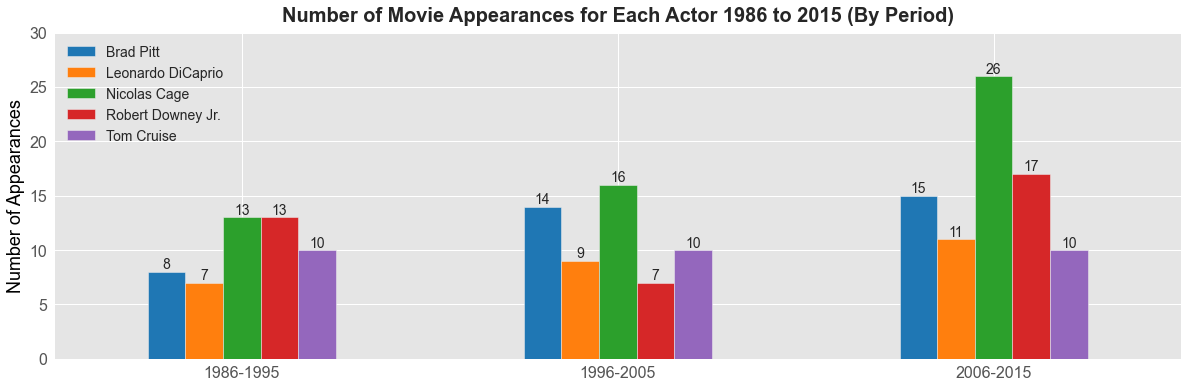

In [291]:
# 1.3 Plot the results of movie_stats

# Define colors for each actor
colors = {'Brad Pitt': 'tab:blue', 
          'Leonardo DiCaprio': 'tab:orange',
          'Nicolas Cage': 'tab:green',
          'Robert Downey Jr.': 'tab:red',
          'Tom Cruise': 'tab:purple'}

# Set base style
plt.style.use("ggplot")

# Plot the results of movie_stats_total
ax=movies_stats.plot.bar(figsize=(18, 6), color=colors)

# Customize plot title and labels
plt.title("Number of Movie Appearances for Each Actor 1986 to 2015 (By Period)", fontweight="bold", size=20 , y=1.015)
plt.xlabel('', fontsize=18, color="black")
plt.ylabel('Number of Appearances', fontsize=18, color="black")
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)

# Add legend
plt.legend(loc='upper left', fontsize = 14)

# Add bar values
# 1. Access the bars (aka patches)
bars = ax.patches
# 2. For each bar
for bar in bars:
    # 3. Add text (.get_height() is the count/value)
    ax.text(bar.get_x() + bar.get_width()/2.,
            bar.get_height(),
            f'{bar.get_height()}',
            ha="center",va="bottom",
            size="14")
    
# Increase upper limit of y-axis so that the top bar value is comfortably displayed
ax.set(ylim=[0,30])

# Show the plot    
plt.show()


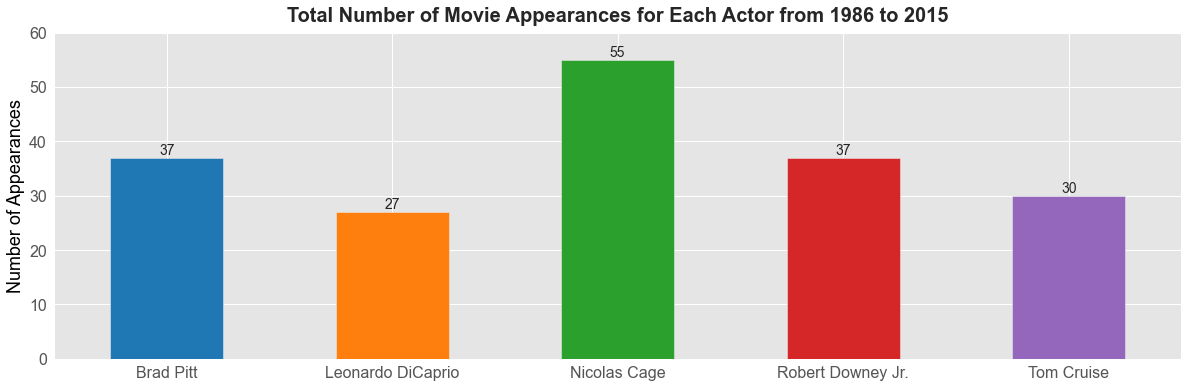

In [292]:
# 2. Who appeared in the most movies in total?

movie_stats_total=movies.groupby("period")["starring"].value_counts().unstack().sum()

# Plot the results of movie_stats_total
ax=movie_stats_total.plot.bar(figsize=(18,6), color=colors.values())

# Customize plot title and labels
plt.title("Total Number of Movie Appearances for Each Actor from 1986 to 2015", fontweight="bold", size=20 , y=1.015)
plt.xlabel('', fontsize=18, color="black")
plt.ylabel('Number of Appearances', fontsize=18, color="black")
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)

# Add bar values
# 1. Access the bars (aka patches)
bars = ax.patches
# 2. For each bar
for bar in bars:
    # 3. Add text (.get_height() is the count/value)
    ax.text(bar.get_x() + bar.get_width()/2.,
            bar.get_height(),
            f'{bar.get_height()}',
            ha="center",va="bottom",
            size="14")

# Increase upper limit of y-axis so that the top bar value is comfortably displayed
ax.set(ylim=[0,60])

# Show the plot
plt.show()

In [293]:
# 3. Who had the best rate of output between 1986 and 2015?

# Calculate the per year output of each star over 30 years
movie_stats_total/30

starring
Brad Pitt            1.233333
Leonardo DiCaprio    0.900000
Nicolas Cage         1.833333
Robert Downey Jr.    1.233333
Tom Cruise           1.000000
dtype: float64

> **Analysis**: To answer question 1, Nicolas Cage was the clear "winner" in terms of quantity of output. He outperformed Cruise and Pitt in each 10-year period and was especially active between 2006 and 2015. Cage is somewhat known for taking grittier roles and dabbling in gorey horror movies or low-budget crime dramas. Therefore, the turnaround for such movies is much faster than the epic dramas and summer blockbusters Pitt and Cruise are know for. Over 30 years, Cage has put out 55 movies while Cruise, 18 months older than Cage, has starred in _only_ 30-- nearly half as many. He's averaged nearly 2 movies a year for 30 years.

### Research Question 2: Who had the highest average revenue and highest total revenue?
1. Analyze the distribution of revenue for each actor
2. Examine the average revenue by actor
3. Examine the total revenue by actor

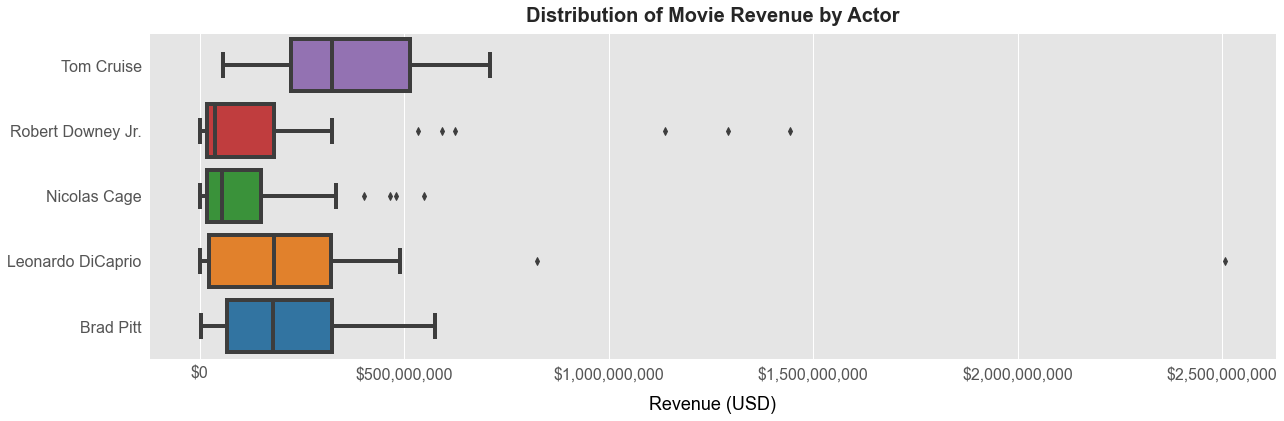

In [294]:
# 1. Analyze the distribution of revenue for each actor

# Isolate data for x and y axes
starring=movies["starring"]
revenue=movies["revenue_adj"]

# Initialize figure, ax, and set figure size for seaborn plot
f, ax = plt.subplots(figsize=(18, 6))

# Set base style
plt.style.use("ggplot")

# Create seaborn boxplot
sns.boxplot(x=revenue, 
            y=starring, 
            orient='h', #horizontal boxplot
            palette=colors, 
            order=["Tom Cruise", "Robert Downey Jr.", "Nicolas Cage", "Leonardo DiCaprio", "Brad Pitt"])

# Customize plot title and labels
plt.title("Distribution of Movie Revenue by Actor", fontweight="bold", size=20 , y=1.015)
plt.xlabel('Revenue (USD)', fontsize = 18, labelpad=14, color="black")
plt.ylabel("")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Format xticks labels with dollar sign and commas 
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

# Show plot
plt.show()

> **Analysis**: I initially prepared made a detailed set of histograms to take a look at the distribution of the revenue for movies starring each actor, but after I made

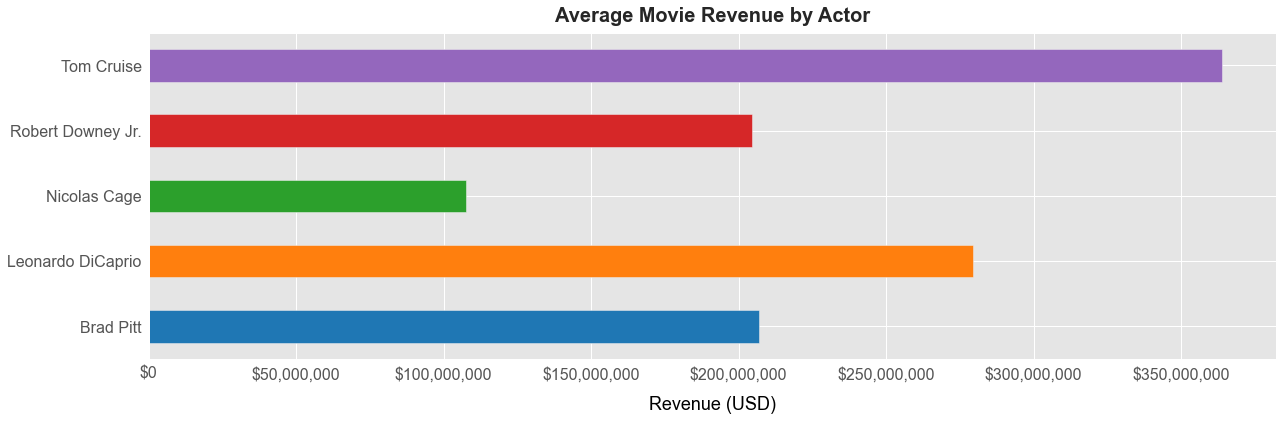

In [296]:
# 2.2 Plot the average revenue by actor

# Isolate data for x and y axes
mean_revenue=movies.groupby("starring")["revenue_adj"].mean()

# Initialize figure, ax, and set figure size
f, ax = plt.subplots(figsize=(18, 6))

# Set base style
plt.style.use("ggplot")

# Create matplotlib horizontal bargragh with preset colors
mean_revenue.plot.barh(color=colors.values())

# Customize plot title and labels
plt.xlabel('Revenue (USD)', fontsize = 18, labelpad=14, color="black")
plt.ylabel('', fontsize=18, color="black")
plt.title("Average Movie Revenue by Actor", fontweight="bold", size=20 , y=1.015)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Format xticks labels with dollar sign and commas 
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

# Show plot
plt.show()

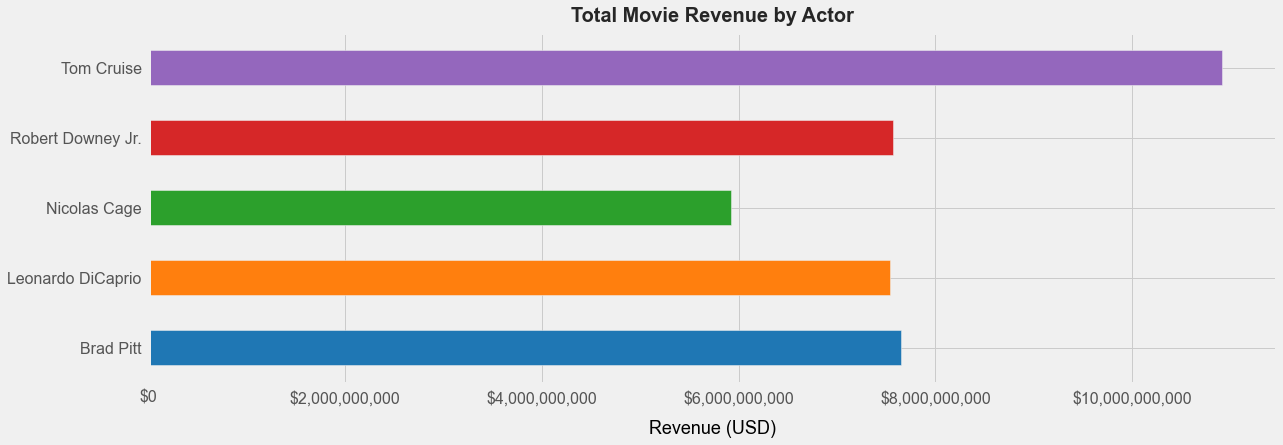

In [227]:
# 3. Examine the total revenue by actor

# Get the total revenue for movies featuring each actor
total_revenue=movies.groupby("starring")["revenue_adj"].sum()

# Set base style
plt.style.use("fivethirtyeight")

# Initialize figure, ax, and set figure size
f, ax = plt.subplots(figsize=(18, 6))

# Create matplotlib horizontal bargragh with preset colors
total_revenue.plot.barh(color=colors.values())

# Customize plot title and labels
plt.xlabel('Revenue (USD)', fontsize = 18, labelpad=14, color="black")
plt.ylabel('', fontsize=16, color="black")
plt.title("Total Movie Revenue by Actor", fontweight="bold", size=20 , y=1.015)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Format xticks labels with dollar sign and commas
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

# Show plot
plt.show()

### Research Question 3: Who had the highest average revenue ROI and what is the correlation between ROI and revenue?
1. Investigate the average movie ROI by actor
2. Evaluate the correlation between ROI and revenue

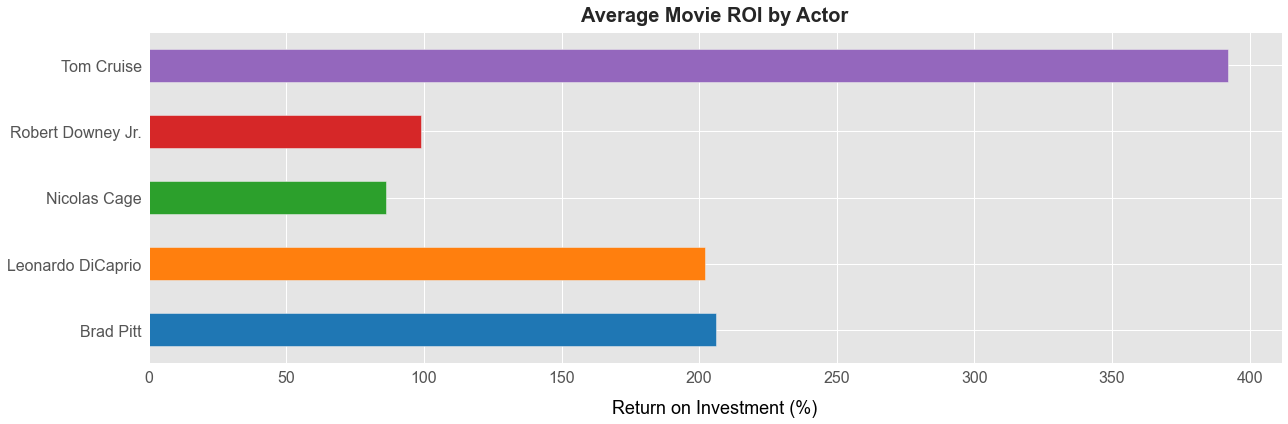

In [181]:
# 1. Investigate the average movie ROI by actor
# 1.1 Vizualize the data

# Get the mean ROI for each actor
mean_roi=movies.groupby("starring")["ROI%"].mean()

# Set base style
plt.style.use("ggplot")

# Initialize figure, ax, and set figure size
f, ax = plt.subplots(figsize=(18, 6))

# Create matplotlib horizontal bargragh with preset colors
mean_roi=plot.barh(color=colors.values())

# Customize plot title and labels
plt.title("Average Movie ROI by Actor", fontweight="bold", size=20 , y=1.015)
plt.xlabel('Return on Investment (%)', fontsize = 18, labelpad=14, color="black")
plt.ylabel('', fontsize=16, color="black")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Show plot
plt.show()

In [182]:
# 1.2 Peak into highest and lowest ROI movies

movies.sort_values(by=["ROI%"],ascending=False)

,original_title,budget_adj,revenue_adj,release_year,vote_average,popularity,period,ROI%,starring
377,Top Gun,29841096,709881085,1986,6.6,1.469796,1986-1995,2278.87,Tom Cruise
188,Rain Man,46097276,654259434,1988,7.4,1.459821,1986-1995,1319.30,Tom Cruise
218,Leaving Las Vegas,5151481,71262150,1995,6.9,1.162695,1986-1995,1283.33,Nicolas Cage
977,Born on the Fourth of July,24625789,283199562,1989,6.3,0.724013,1986-1995,1050.01,Tom Cruise
220,Romeo + Juliet,20158143,204777203,1996,6.6,1.920156,1996-2005,915.85,Leonardo DiCaprio
...,...,...,...,...,...,...,...,...,...
3592,The Gingerbread Man,36890873,2264463,1998,6.2,0.360079,1996-2005,-93.86,Robert Downey Jr.
8857,Stolen,33241050,2000690,2012,5.1,1.157127,2006-2015,-93.98,Nicolas Cage
6405,The Singing Detective,10533513,573582,2003,5.5,0.494247,1996-2005,-94.55,Robert Downey Jr.
6811,Total Eclipse,12784733,543173,1995,6.3,0.473114,1986-1995,-95.75,Leonardo DiCaprio


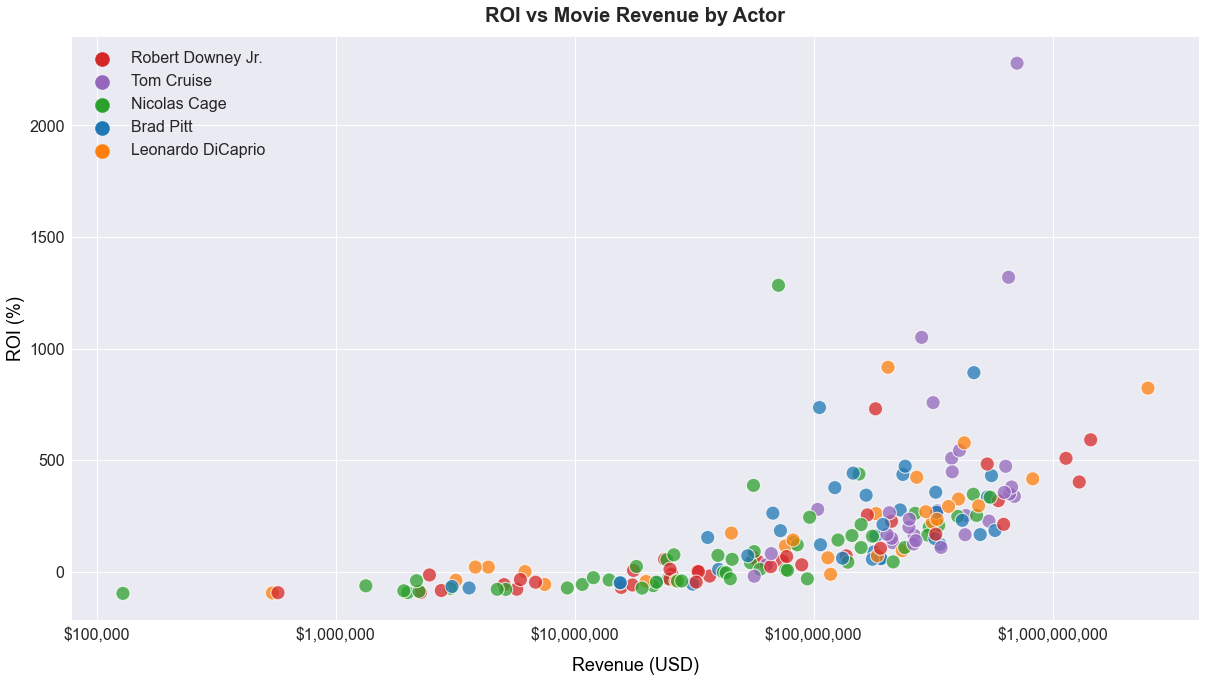

In [208]:
# 2. Evaluate the correlation between ROI and revenue
# 2.1 Visualize the data

# Initialize figure, ax, and set figure size
f, ax = plt.subplots(figsize=(18, 10))

# Set base style
plt.style.use("ggplot")

# Create seaborn scatterplot object
splot=sns.scatterplot(x="revenue_adj",y="ROI%", data=movies, hue="starring", s=200, palette=colors, alpha=0.75)

# Customize plot title and labels
plt.title("ROI vs Movie Revenue by Actor", fontweight="bold", size=20 , y=1.015)
plt.xlabel('Revenue (USD)', fontsize = 18, labelpad=14, color="black")
plt.ylabel('ROI (%)', fontsize=18, color="black")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Create legend
plt.legend(fontsize=16, loc='upper left', markerscale=2)

# Set the `xscale` to log to improve readability
splot.set(xscale="log")

# Format xticks labels with dollar sign and commas
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

# Show plot
plt.show()


In [306]:
# Extract the correlation coffiecient (r value)
rvalue=linregress(movies["revenue_adj"], movies["ROI%"])[2]

# Print result
print("The correlation coefficient of revenue and ROI is {}".format(round(rvalue,2)))

The correlation coefficient of revenue and ROI is 0.55


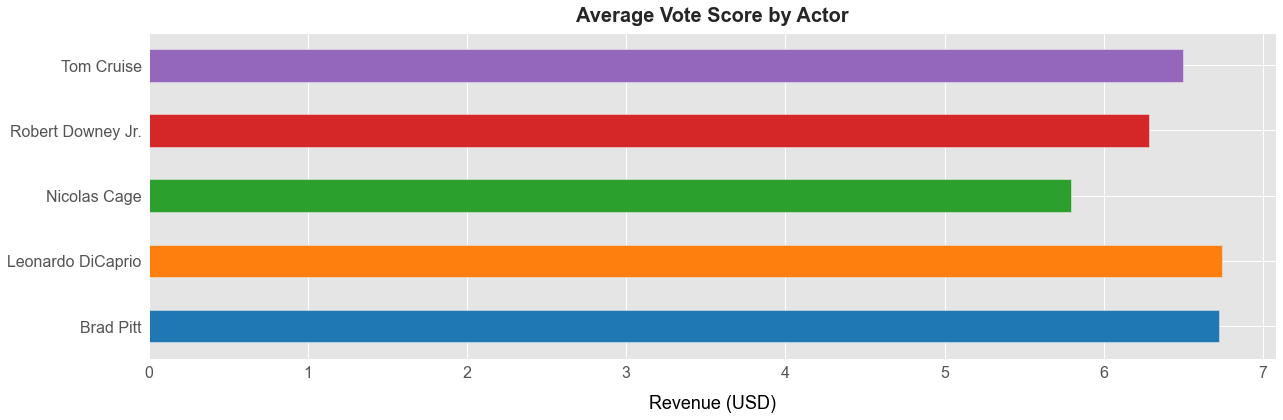

In [304]:
# Create dataframe showing the average vote count for each actor
vote_average=movies.groupby("starring")["vote_average"].mean()

# Set base style
plt.style.use("ggplot")

# Initialize figure, ax, and set figure size
f, ax = plt.subplots(figsize=(18, 6))

# Create horizonal matplotlib bargraph with preset colors
vote_average.plot.barh(color=colors.values())

# Customize plot title and labels
plt.title("Average Vote Score by Actor", fontweight="bold", size=20 , y=1.015)
plt.xlabel('Revenue (USD)', fontsize = 18, labelpad=14, color="black")
plt.ylabel('', fontsize=16, color="black")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Show plot
plt.show()

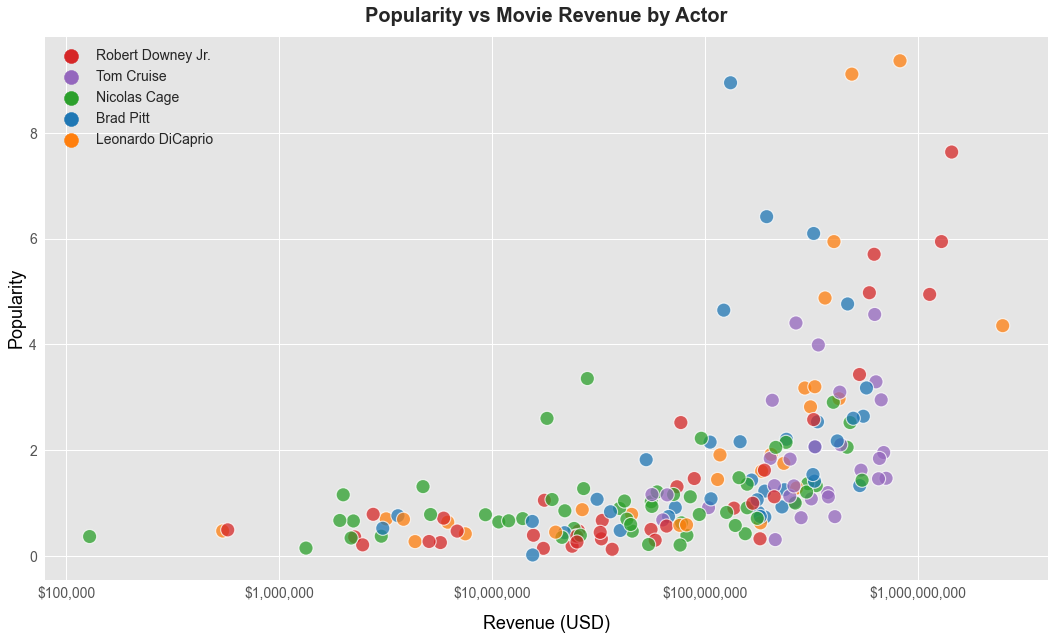

In [193]:
# Set base style
plt.style.use("ggplot")

# Initialize figure, ax, and set figure size
f, ax = plt.subplots(figsize=(18, 10))

# Create seaborn scatterplot object
splot=sns.scatterplot(x="revenue_adj",y="popularity", data=movies, hue="starring", s=200, palette=colors, alpha=0.75)

# Customize plot title and labels
plt.title("Popularity vs Movie Revenue by Actor", fontweight="bold", size=20 , y=1.015)
plt.xlabel('Revenue (USD)', fontsize = 18, labelpad=14, color="black")
plt.ylabel('Popularity', fontsize=18, color="black")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16, loc='upper left', markerscale=2)

# Set the `xscale` to log
splot.set(xscale="log")

# Format xticks labels with dollar sign and commas
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

# Show plot
plt.show()


In [305]:
# Extract the correlation coffiecient (r value)
rvalue=linregress(movies["revenue_adj"], movies["ROI%"])[2]

# Print result
print("The correlation coefficient of revenue and popularity is {}".format(round(rvalue,2)))

The correlation coefficient of revenue and popularity is 0.55


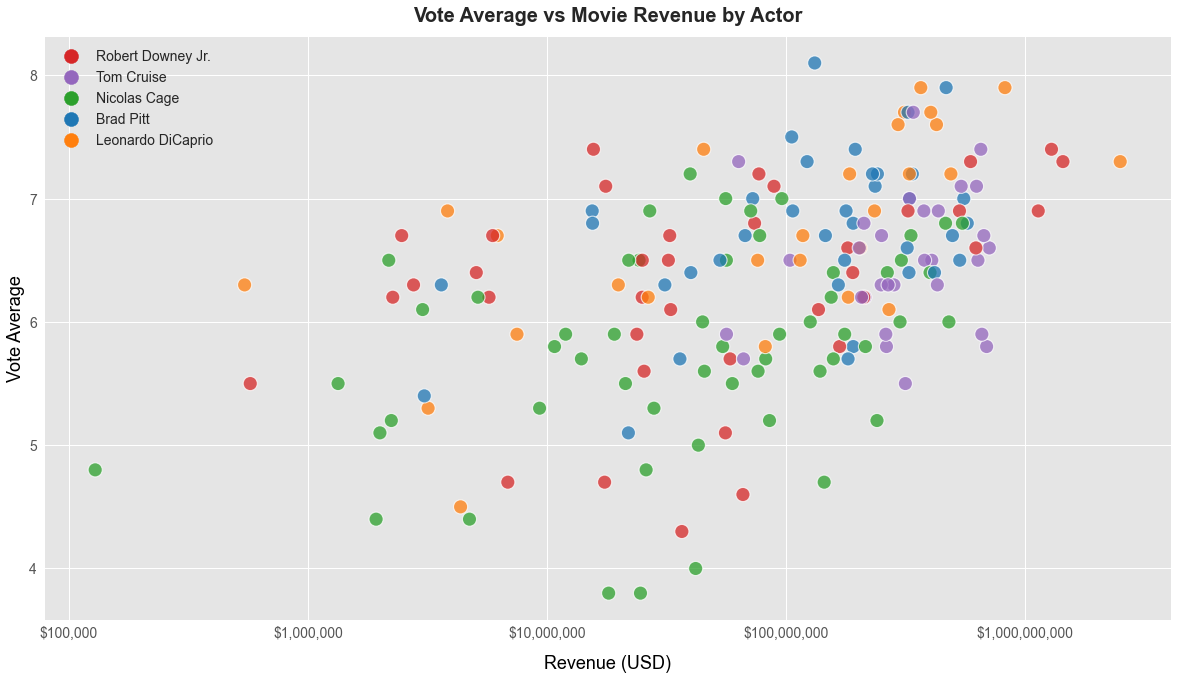

In [221]:
#Reference: Setting to logscale https://www.datacamp.com/community/tutorials/seaborn-python-tutorial#log

f, ax = plt.subplots(figsize=(18, 10))

plt.style.use("ggplot")
splot=sns.scatterplot(x="revenue_adj",y="vote_average", data=movies, hue="starring", s=200, palette=colors, alpha=0.75)

plt.title("Vote Average vs Movie Revenue by Actor", fontweight="bold", size=20 , y=1.015)
plt.xlabel('Revenue (USD)', fontsize = 18, labelpad=14, color="black")
plt.ylabel('Vote Average', fontsize=18, color="black")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16, loc='upper left', markerscale=2)

# Set the `xscale` to log
splot.set(xscale="log")

# Format xticks labels with dollar sign and commas
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

# Show plot
plt.show()


In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


In [ ]:
#Reference: For formatting xticks labels with dollar sign and commas 
#https://stackoverflow.com/questions/38152356/matplotlib-dollar-sign-with-thousands-comma-tick-labels

#Reference: Setting to logscale https://www.datacamp.com/community/tutorials/seaborn-python-tutorial#log

### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!